# Analysis of Complex Networks 
## Assignment 5 (Group 6)
### Student: André Dussing  ID: 018113442F 

Github: https://github.com/andreunilux/Complex-Networks check for change

In [1]:
# import necessary libraries
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import cosine_similarity

At first we set the path according to our dataset we are using (here Group6)


1. Facebook-Ego 
2. Twitter-Ego

In [2]:
path = "exercise_complex_network/Datasets/Group6"
path_facebook = os.path.join(path,"Facebook-Ego", "1684.edges" ) # 1. Facebook-Ego
path_twitter =  os.path.join(path,"Twitter-Ego", "2029971.edges" ) # 2. Twitter-Ego
# Now we read the edge list from the file and create the graph with NetworkX


facebook_graph = nx.read_edgelist(path_facebook, nodetype=int) # Undirected
twitter_graph = nx.read_edgelist(path_twitter, nodetype=int, create_using=nx.DiGraph()) #Directed




### (a) Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs induced on the chosen ten nodes

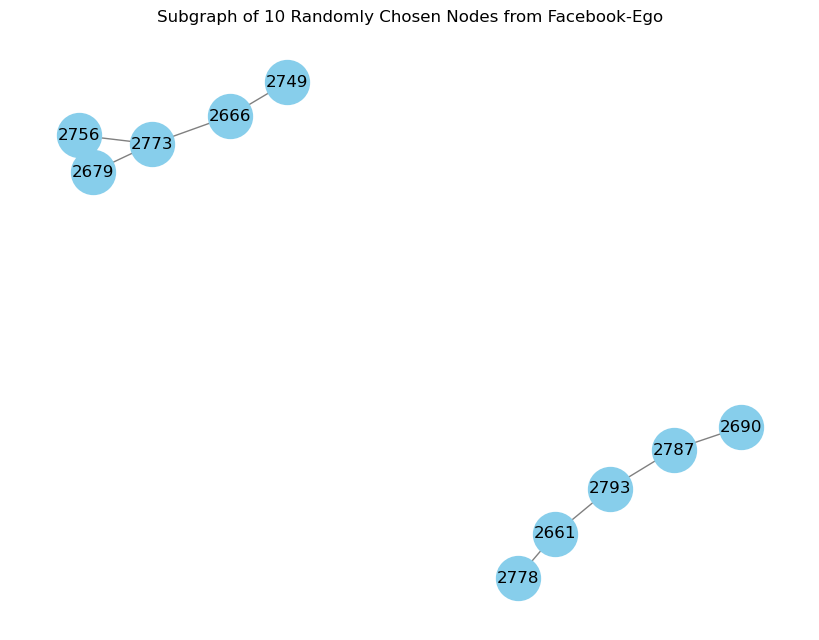

In [3]:
# Choose 10  nodes from the Facebook-Ego network
chosen_nodes = list(facebook_graph.nodes())[:10]

# Create a subgraph view for the chosen nodes
subgraph = facebook_graph.subgraph(chosen_nodes)

# Plot the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1000, font_size=12)
plt.title("Subgraph of 10  Chosen Nodes from Facebook-Ego")
plt.show()

### (b) Please list three algorithms for community detection.

I will focus on those 3 algorithms:
1. Divisive Hierarchical Clustering (Girvan-Newman)
2. Modularity Maximization
3. Louvain Algorithm

### (c) Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. Please plot graphs to show the communities (mark nodes with different colors / draw communities unions....).

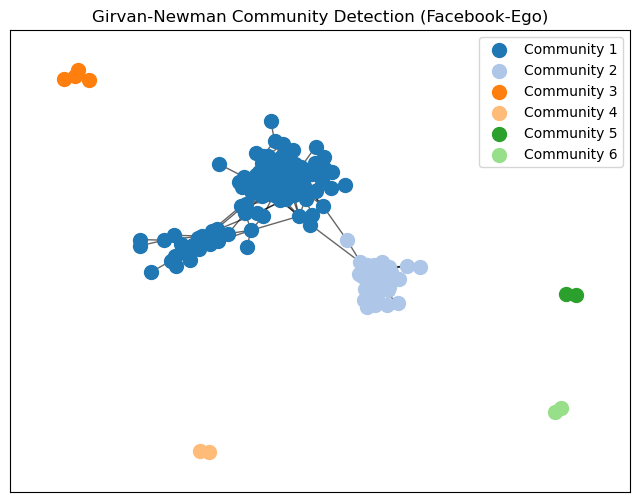

In [14]:
from networkx.algorithms.community import girvan_newman

# Function to detect communities using Girvan-Newman
def girvan_newman_communities(graph):
    comp = girvan_newman(graph)
    return tuple(sorted(c) for c in next(comp))

# Detect communities
gn_communities = girvan_newman_communities(facebook_graph)

# Visualize the communities
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(facebook_graph)
colors = plt.get_cmap('tab20')

for i, community in enumerate(gn_communities):
    nx.draw_networkx_nodes(facebook_graph, pos, nodelist=community, node_color=[colors(i)], label=f"Community {i+1}", node_size=100)

nx.draw_networkx_edges(facebook_graph, pos, alpha=0.6, edge_color="black")
plt.title("Girvan-Newman Community Detection (Facebook-Ego)")
plt.legend()
plt.show()


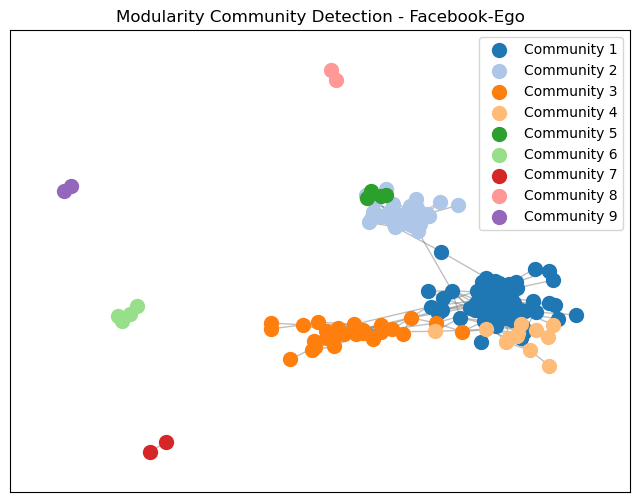

In [18]:
from networkx.algorithms.community import greedy_modularity_communities

# Modularity maximization algorithm
modularity_communities = greedy_modularity_communities(facebook_graph)

# Visualizing the modularity-based communities
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(facebook_graph)
colors = plt.get_cmap('tab20')

for i, community in enumerate(modularity_communities):
    nx.draw_networkx_nodes(facebook_graph, pos, nodelist=list(community), node_color=[colors(i)], label=f"Community {i+1}", node_size=100)

nx.draw_networkx_edges(facebook_graph, pos, alpha=0.5, edge_color="gray")
plt.title("Modularity Community Detection - Facebook-Ego")
plt.legend()
plt.show()


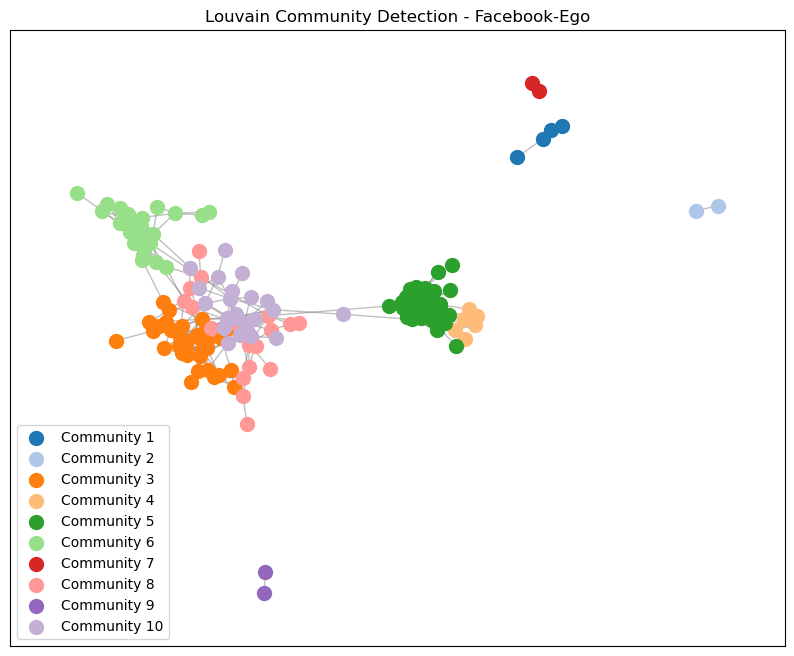

In [16]:
from networkx.algorithms.community import louvain_communities

# Louvain Community Detection Algorithm
louvain_communities_list = louvain_communities(facebook_graph, resolution=1, threshold=1e-07)

# Visualizing the Louvain communities
pos = nx.spring_layout(facebook_graph)
plt.figure(figsize=(10, 8))

# Color each community differently
colors = plt.get_cmap('tab20')

for i, community in enumerate(louvain_communities_list):
    nx.draw_networkx_nodes(facebook_graph, pos, nodelist=list(community), node_color=[colors(i)], label=f"Community {i+1}", node_size=100)

# Draw edges
nx.draw_networkx_edges(facebook_graph, pos, alpha=0.5, edge_color="gray")
plt.title("Louvain Community Detection - Facebook-Ego")
plt.legend()
plt.show()

### (d) What are the differences between the community detection results shown in (c)? What are the possible reasons?

Let’s compare the three algorithms:

1. Divisive Hierarchical Clustering (Girvan-Newman):
* Characteristics: This algorithm progressively removes high-betweenness edges, causing the graph to break down into smaller subcomponents.
* Results: In the plot we can see that the algorithm finds 6 communities. However only 2 are bigger while the others only consist out of 3 maximum nodes. Only the two big ones are connected.
* Reason: Girvan-Newman tends to find smaller communities because it fragments the graph by removing high-betweenness edges.

2. Modularity Maximization:
* Characteristics: Groups nodes in a way that maximizes modularity, often resulting in communities that are larger but with higher internal connectivity.
* Results: In the plot we can see that the algorithm finds 9 communities. 5 of thoses communities are bigger and interconnected, while the others are small.
* Reason: Modularity Maximization tends to favor denser communities with higher internal edge density.

3. Louvain Algorithm:
* Characteristics: A hierarchical algorithm that optimizes modularity at each step. It’s fast and scalable for large networks.
* Results: In the plot we can see that the algorithm finds 10 communities. 6 of thoses communities are bigger and interconnected, while the others are smaller.
* Reason: Louvain is a hierarchical approach and is effective at detecting communities at multiple levels, meaning it can find large clusters while maintaining high modularity.

    
    
    